切断関数$T$を掛けた場合の導出。非常に複雑になるので、変数名のつけかたに注意する。

In [1]:
from sympy import *

# おまじない
init_printing()

# 相互作用の微分をどこまで自動化できるかを試す。
# ベクトルをベクトルのまま書ければいいのだが。
# まず、要素を全部書き並べる形で。

# com position of molecule i
v_i = Matrix(3,1,symbols('v_xi,v_yi,v_zi'))
# position of atom j in molecule i
w_j = Matrix(3,1,symbols('w_xj,w_yj,w_zj'))
# Rotation Matrix
r11 = Function('r11', real=True)
r12 = Function('r12', real=True)
r13 = Function('r13', real=True)
r21 = Function('r21', real=True)
r22 = Function('r22', real=True)
r23 = Function('r23', real=True)
r31 = Function('r31', real=True)
r32 = Function('r32', real=True)
r33 = Function('r33', real=True)

abc = symbols('a_i,b_i,c_i')
a_i, b_i,c_i = abc

R_i = Matrix(3,3,[r11(*abc),
                 r12(*abc),
                 r13(*abc),
                 r21(*abc),
                 r22(*abc),
                 r23(*abc),
                 r31(*abc),
                 r32(*abc),
                 r33(*abc)])

r_ij = v_i+R_i*w_j

r_ij

⎡vₓᵢ + w_xj⋅r₁₁(aᵢ, bᵢ, cᵢ) + w_yj⋅r₁₂(aᵢ, bᵢ, cᵢ) + w_zj⋅r₁₃(aᵢ, bᵢ, cᵢ) ⎤
⎢                                                                         ⎥
⎢v_yi + w_xj⋅r₂₁(aᵢ, bᵢ, cᵢ) + w_yj⋅r₂₂(aᵢ, bᵢ, cᵢ) + w_zj⋅r₂₃(aᵢ, bᵢ, cᵢ)⎥
⎢                                                                         ⎥
⎣v_zi + w_xj⋅r₃₁(aᵢ, bᵢ, cᵢ) + w_yj⋅r₃₂(aᵢ, bᵢ, cᵢ) + w_zj⋅r₃₃(aᵢ, bᵢ, cᵢ)⎦

In [2]:
# com position of molecule k
v_k = Matrix(3,1,symbols('v_xk,v_yk,v_zk'))
# position of atom j in molecule i
w_l = Matrix(3,1,symbols('w_xl,w_yl,w_zl'))

a_k,b_k,c_k = symbols('a_k,b_k,c_k')

R_k = Matrix(3,3,[r11(a_k,b_k,c_k),
                 r12(a_k,b_k,c_k),
                 r13(a_k,b_k,c_k),
                 r21(a_k,b_k,c_k),
                 r22(a_k,b_k,c_k),
                 r23(a_k,b_k,c_k),
                 r31(a_k,b_k,c_k),
                 r32(a_k,b_k,c_k),
                 r33(a_k,b_k,c_k)])

r_kl = v_k+R_k*w_l
r_kl


⎡vₓₖ + wₓₗ⋅r₁₁(aₖ, bₖ, cₖ) + w_yl⋅r₁₂(aₖ, bₖ, cₖ) + w_zl⋅r₁₃(aₖ, bₖ, cₖ) ⎤
⎢                                                                        ⎥
⎢v_yk + wₓₗ⋅r₂₁(aₖ, bₖ, cₖ) + w_yl⋅r₂₂(aₖ, bₖ, cₖ) + w_zl⋅r₂₃(aₖ, bₖ, cₖ)⎥
⎢                                                                        ⎥
⎣v_zk + wₓₗ⋅r₃₁(aₖ, bₖ, cₖ) + w_yl⋅r₃₂(aₖ, bₖ, cₖ) + w_zl⋅r₃₃(aₖ, bₖ, cₖ)⎦

In [4]:
r_ = r_ij-r_kl
r_

⎡ vₓᵢ - vₓₖ + w_xj⋅r₁₁(aᵢ, bᵢ, cᵢ) - wₓₗ⋅r₁₁(aₖ, bₖ, cₖ) + w_yj⋅r₁₂(aᵢ, bᵢ, cᵢ
⎢                                                                             
⎢v_yi - v_yk + w_xj⋅r₂₁(aᵢ, bᵢ, cᵢ) - wₓₗ⋅r₂₁(aₖ, bₖ, cₖ) + w_yj⋅r₂₂(aᵢ, bᵢ, c
⎢                                                                             
⎣v_zi - v_zk + w_xj⋅r₃₁(aᵢ, bᵢ, cᵢ) - wₓₗ⋅r₃₁(aₖ, bₖ, cₖ) + w_yj⋅r₃₂(aᵢ, bᵢ, c

) - w_yl⋅r₁₂(aₖ, bₖ, cₖ) + w_zj⋅r₁₃(aᵢ, bᵢ, cᵢ) - w_zl⋅r₁₃(aₖ, bₖ, cₖ) ⎤
                                                                       ⎥
ᵢ) - w_yl⋅r₂₂(aₖ, bₖ, cₖ) + w_zj⋅r₂₃(aᵢ, bᵢ, cᵢ) - w_zl⋅r₂₃(aₖ, bₖ, cₖ)⎥
                                                                       ⎥
ᵢ) - w_yl⋅r₃₂(aₖ, bₖ, cₖ) + w_zj⋅r₃₃(aᵢ, bᵢ, cᵢ) - w_zl⋅r₃₃(aₖ, bₖ, cₖ)⎦

In [5]:
r_2 = (r_.T*r_)[0]
r_2

`r`は今は定義しておくだけ。

$\mathbf{r}=\mathbf{r}_{ij}-\mathbf{r}_{kl}$はプログラム中では`r_`と書き、その要素は`r_x`,`r_y`,`r_z`、大きさは$r$は`r`と書く。

In [9]:
r, r_x,r_y,r_z = symbols('r r_x r_y r_z')
phi, phi_r, phi_rr = symbols('phi phi_r, phi_rr')


$T$は切断関数。これもあらかじめ微分したものに名前をつけておく。

In [12]:
T, T_v, T_vv = symbols('T T_v, T_vv')
v_ = v_i - v_k
v_2 = (v_.T*v_)[0]
v_2

In [8]:
v, v_x,v_y,v_z = symbols('v v_x v_y v_z')

## 一階微分
${d\phi(r)\over dr}$を`phi_r`のように書く。
### 並進

$\phi$を$x_i$で微分する。${\partial \phi\over \partial x_i}={\partial r\over\partial  x_i}\cdot{\partial \phi\over \partial r}={\partial \left|\mathbf{r}\right|\over \partial x_i}\cdot{\partial \phi\over \partial r}$

In [18]:
# vxiで微分する
T_xi = diff(sqrt(v_2), v_i[0]) * T_v
phi_xi = diff(sqrt(r_2), v_i[0]) * phi_r

D = phi_xi * T + phi * T_xi

D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs((r_x**2+r_y**2+r_z**2)**0.5,r)
D = D.subs(v_[0], 'v_x').subs(v_[1],'v_y').subs(v_[2],'v_z')
D = D.subs((v_x**2+v_y**2+v_z**2)**0.5,'v')
dxi = D
D

### 回転
${\partial \mathbf{R}_i\over \partial a_i}\cdot \mathbf{w}_j$を$\mathbf{s}_a$と書く。切断関数は回転と無関係なので、角度で微分すると消える。

In [19]:
# rをaiで微分する
phi_ai = diff(sqrt(r_2), a_i) * phi_r 

D = phi_ai * T
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
dai = D
D

$\mathbf{r}\cdot\left({\partial \mathbf{R}_i\over \partial a_i}\cdot \mathbf{w}_j\right)$を何と書こう。

$rs_a$かな

## 二階微分
### 並進・並進
#### 同一変数

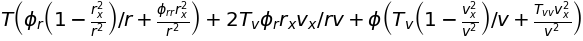

In [21]:
T_xi = diff(sqrt(v_2), v_i[0]) * T_v
phi_xi = diff(sqrt(r_2), v_i[0]) * phi_r
T_xixi = diff(sqrt(v_2), v_i[0], v_i[0]) * T_v + diff(sqrt(v_2), v_i[0]) * diff(sqrt(v_2), v_i[0]) * T_vv
phi_xixi = diff(sqrt(r_2), v_i[0], v_i[0]) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), v_i[0]) * phi_rr

D = phi_xixi*T + 2*phi_xi*T_xi + phi*T_xixi
#dxixi = dxixi.simplify()
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.subs(v_[0], 'v_x').subs(v_[1],'v_y').subs(v_[2],'v_z')
D = D.subs((v_x**2+v_y**2+v_z**2)**0.5,'v')
dxixi = D
D

#### 異なる変数、同じ分子

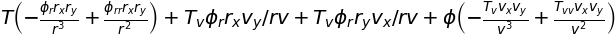

In [25]:
T_yi = diff(sqrt(v_2), v_i[1]) * T_v
phi_yi = diff(sqrt(r_2), v_i[1]) * phi_r
T_xiyi = diff(sqrt(v_2), v_i[0], v_i[1]) * T_v + diff(sqrt(v_2), v_i[0]) * diff(sqrt(v_2), v_i[1]) * T_vv
phi_xiyi = diff(sqrt(r_2), v_i[0], v_i[1]) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), v_i[1]) * phi_rr

D = phi_xiyi*T + phi_xi*T_yi + phi_yi*T_xi + phi*T_xiyi

D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.subs(v_[0], 'v_x').subs(v_[1],'v_y').subs(v_[2],'v_z')
D = D.subs((v_x**2+v_y**2+v_z**2)**0.5,'v')

dxiyi = D
D

#### 異なる分子

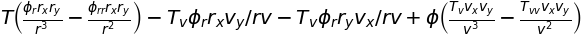

In [27]:
T_yk = diff(sqrt(v_2), v_k[1]) * T_v
phi_yk = diff(sqrt(r_2), v_k[1]) * phi_r
T_xiyk = diff(sqrt(v_2), v_i[0], v_k[1]) * T_v + diff(sqrt(v_2), v_i[0]) * diff(sqrt(v_2), v_k[1]) * T_vv
phi_xiyk = diff(sqrt(r_2), v_i[0], v_k[1]) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), v_k[1]) * phi_rr

D = phi_xiyk*T + phi_xi*T_yk + phi_yk*T_xi + phi*T_xiyk

D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.subs(v_[0], 'v_x').subs(v_[1],'v_y').subs(v_[2],'v_z')
D = D.subs((v_x**2+v_y**2+v_z**2)**0.5,'v')

dxiyk =D
D

### 回転・回転

#### 同じ変数

${\partial^2 \mathbf{R}_i\over \partial a_i^2}\cdot \mathbf{w}_j$を$\mathbf{s}_{aa}$と書く。

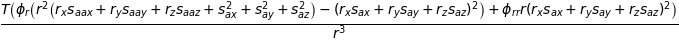

In [28]:
# aiで再度微分
D = diff(sqrt(r_2), a_i, a_i) * phi_r + diff(sqrt(r_2), a_i) * diff(sqrt(r_2), a_i) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs((diff(R_i,a_i,a_i)*w_j)[0], 's_aax').subs((diff(R_i,a_i,a_i)*w_j)[1], 's_aay').subs((diff(R_i,a_i,a_i)*w_j)[2], 's_aaz')
daiai = D*T
D*T

$${\left({{d^2\over dr^2}\phi (r)\over r} - {{d\over dr}\phi(r)\over r^2}\right)\cdot (\mathbf{r}\cdot \mathbf{s}_a)^2+(\mathbf{r}\cdot \mathbf{s}_{aa}+\mathbf{s}_a^2)\cdot {d\over dr}\phi(r)}\over r$$


#### 同じ分子、別変数

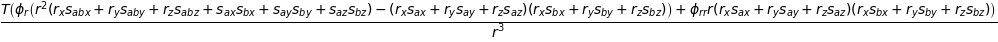

In [29]:
D = diff(sqrt(r_2), a_i, b_i) * phi_r + diff(sqrt(r_2), a_i) * diff(sqrt(r_2), b_i) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs((diff(R_i,b_i)*w_j)[0], 's_bx').subs((diff(R_i,b_i)*w_j)[1], 's_by').subs((diff(R_i,b_i)*w_j)[2], 's_bz')
D = D.subs((diff(R_i,a_i,b_i)*w_j)[0], 's_abx').subs((diff(R_i,a_i,b_i)*w_j)[1], 's_aby').subs((diff(R_i,a_i,b_i)*w_j)[2], 's_abz')
daibi = D*T
D*T

#### 別の分子

${\partial \mathbf{R}_k\over \partial a_k}\cdot \mathbf{w}_l$を$\mathbf{t}_a$と書く。

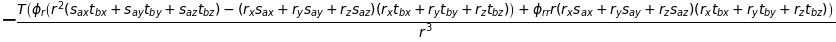

In [30]:
D = diff(sqrt(r_2), a_i, b_k) * phi_r + diff(sqrt(r_2), a_i) * diff(sqrt(r_2), b_k) * phi_rr
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs((diff(R_k,b_k)*w_l)[0], 't_bx').subs((diff(R_k,b_k)*w_l)[1], 't_by').subs((diff(R_k,b_k)*w_l)[2], 't_bz')
daibk = D*T
D*T

### 回転・並進

#### 同じ分子

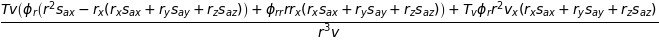

In [33]:
# D1 = phi_xi*T + phi*T_xi
phi_xiai = diff(sqrt(r_2), v_i[0], a_i) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), a_i) * phi_rr

D = phi_xiai*T + phi_ai*T_xi
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_i,a_i)*w_j)[0], 's_ax').subs((diff(R_i,a_i)*w_j)[1], 's_ay').subs((diff(R_i,a_i)*w_j)[2], 's_az')
D = D.subs(v_[0], 'v_x').subs(v_[1],'v_y').subs(v_[2],'v_z')
D = D.subs((v_x**2+v_y**2+v_z**2)**0.5,'v')

dxiai = D
D

#### 別の分子

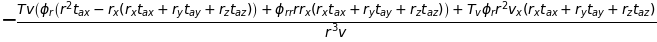

In [36]:
phi_xiak = diff(sqrt(r_2), v_i[0], a_k) * phi_r + diff(sqrt(r_2), v_i[0]) * diff(sqrt(r_2), a_k) * phi_rr
phi_ak = diff(sqrt(r_2), a_k) * phi_r 

D = phi_xiak*T + phi_ak*T_xi
D = D.subs(r_[0], 'r_x').subs(r_[1],'r_y').subs(r_[2],'r_z')
D = D.subs(sqrt(r_x**2+r_y**2+r_z**2),r)
D = D.simplify()
D = D.subs((diff(R_k,a_k)*w_l)[0], 't_ax').subs((diff(R_k,a_k)*w_l)[1], 't_ay').subs((diff(R_k,a_k)*w_l)[2], 't_az')
D = D.subs(v_[0], 'v_x').subs(v_[1],'v_y').subs(v_[2],'v_z')
D = D.subs((v_x**2+v_y**2+v_z**2)**0.5,'v')

dxiak = D
D

In [108]:
from sympy.utilities.codegen import codegen
result = codegen([('dxixi', dxixi),
                  ('dxiyi', dxiyi),
                  ('dxiyk', dxiyk),
                  ('daiai', daiai),
                  ('daibi', daibi),
                  ('daibk', daibk),
                  ('dxiai', dxiai),
                  ('dxiak', dxiak)],
                 prefix='DerivTrunc',
                 language='f95',
                 project='NMA',
                 to_files=True)
print(result[0][1])

TypeError: 'NoneType' object is not subscriptable

このコード自体はなかなかいいぞ。何しろ書き写しそこねる心配がない。